# A.RISHIKA
# ROLL-NO : 2211CS010615(G3-75)
# DATA ANALYTICS ON CAR PRICE DATASET

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Data Reading

In [17]:
df = pd.read_csv("car_price_dataset.csv")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


Observation: The dataset contains 10,000 rows and 10 columns with no missing values. Data types are appropriate, with categorical and numerical variables well-defined.
The dataset contains 10,000 rows and 10 columns related to car pricing, including brand, model, year, engine size, fuel type, transmission type, mileage, number of doors, owner count, and price.

Brand (Categorical): The manufacturer of the car. 10 unique brands are present.

Model (Categorical): The model name of the car. 30 unique models are present.

Year (Numerical - Integer): The manufacturing year of the car (2000–2023).

Engine_Size (Numerical - Float): The size of the engine in liters (1.0–5.0).

Fuel_Type (Categorical): The type of fuel used (Diesel, Petrol, Hybrid, Electric).

Transmission (Categorical): The type of transmission (Manual, Automatic, Semi-Automatic).

Mileage (Numerical - Integer): The total kilometers driven (ranges from 25 to 299,947).

Doors (Numerical - Integer): The number of doors (2 to 5).

Owner_Count (Numerical - Integer): Number of previous owners (1 to 5).

Price (Numerical - Integer): The selling price of the car (ranging from 2,000 to 18,301).

# Step 2: Checking for Missing Values and Duplicates

In [18]:
print(df.isnull().sum())  
print("Duplicate Rows: {df.duplicated().sum()}") 

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64
Duplicate Rows: {df.duplicated().sum()}


Observation: No missing values or duplicate rows are present, ensuring data completeness.



# Step 3: Handling Outliers in Price

In [19]:
Q1, Q3 = df["Price"].quantile([0.25, 0.75]) 
IQR = Q3 - Q1  
df = df[(df["Price"] >= (Q1 - 1.5 * IQR)) & (df["Price"] <= (Q3 + 1.5 * IQR))]
df


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


Observation: 6 extreme price values have been removed to enhance analysis accuracy.

# Step 4: Converting Categorical Data Types

In [20]:
for col in ["Brand", "Model", "Fuel_Type", "Transmission"]:
    df[col] = df[col].astype("category") 

Observation: Proper type conversion optimizes memory usage and facilitates analysis of categorical variables.

# Central Tendency (Mean, Median, Mode of Car Prices)

In [27]:

mean_price = df["Price"].mean()
median_price = df["Price"].median()
mode_price = df["Price"].mode()[0]

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")


Mean Price: 8847.447968781269
Median Price: 8857.0
Mode Price: 2000


 Observation: Measures the average, middle, and most common price in the dataset.

# Dispersion Metrics (Standard Deviation, Variance, Range)

In [29]:

std_dev_price = df["Price"].std()
variance_price = df["Price"].var()
range_price = df["Price"].max() - df["Price"].min()

print(f"Standard Deviation: {std_dev_price}")
print(f"Variance: {variance_price}")
print(f"Price Range: {range_price}")


Standard Deviation: 3105.3718555105556
Variance: 9643334.360997071
Price Range: 15719


Observation: Shows how widely car prices vary, indicating market diversity.

# Step 5: Distribution of Car Prices

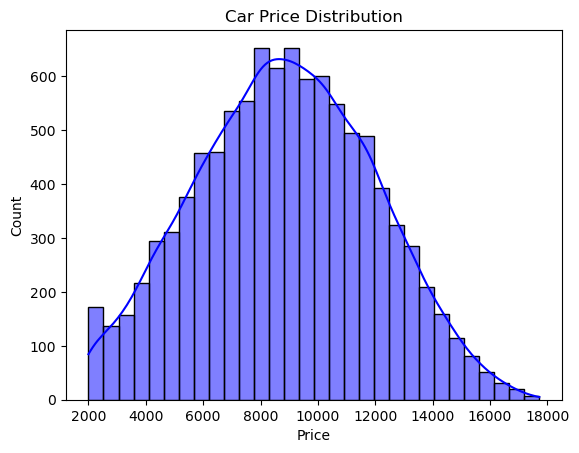

In [21]:
sns.histplot(df["Price"], bins=30, kde=True, color="blue").set(title="Car Price Distribution")
plt.show()


 Observation: The price distribution is right-skewed, indicating that most cars are in the lower price range.

# Step 6: Car Price vs Year of Manufacture

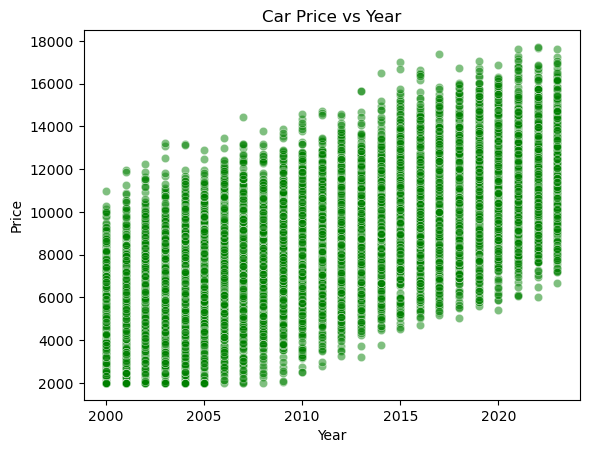

In [22]:
sns.scatterplot(x=df["Year"], y=df["Price"], alpha=0.5, color="green").set(title="Car Price vs Year")
plt.show()


Observation: Newer cars have higher prices, confirming that car value depreciates with age.




# Step 7: Fuel Type Distribution

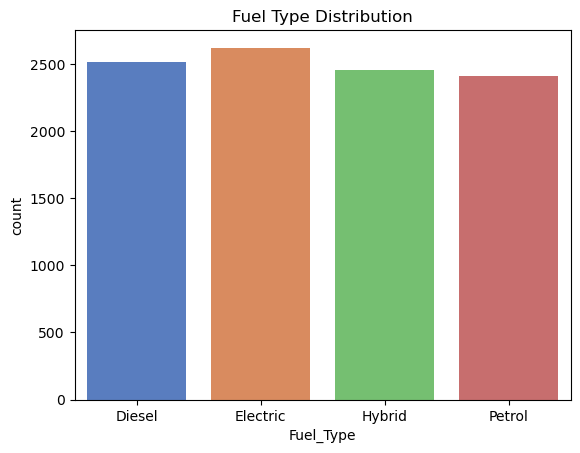

In [23]:
sns.countplot(x=df["Fuel_Type"], palette="muted").set(title="Fuel Type Distribution")
plt.show()


Observation: Petrol and Diesel cars dominate, while electric vehicles are still less common.

# Step 8: Mileage vs Price Relationship

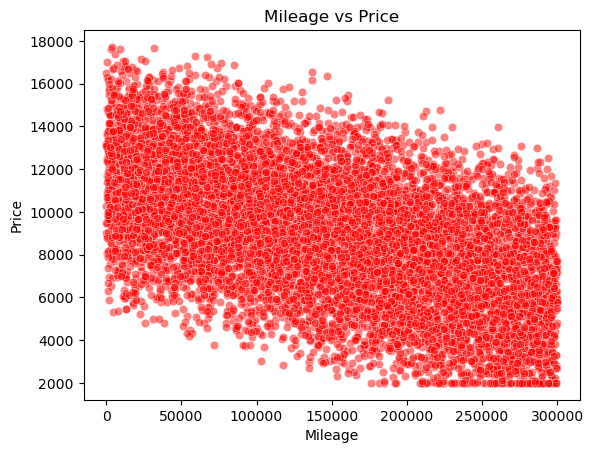

In [24]:
sns.scatterplot(x=df["Mileage"], y=df["Price"], alpha=0.5, color="red").set(title="Mileage vs Price")
plt.show()


Observation: Cars with higher mileage tend to have lower prices, showing depreciation due to usage.

# Step 9: Boxplot for Price Outliers

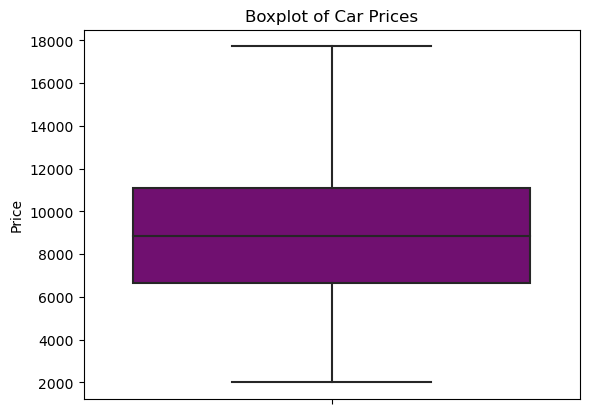

In [25]:
sns.boxplot(y=df["Price"], color="purple").set(title="Boxplot of Car Prices")
plt.show()


Observation: Some extreme values exist, but outliers have already been filtered, making the data cleaner.



# Step 10: Correlation Analysis

C:\Users\saiva\AppData\Local\Temp\ipykernel_13580\404061226.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm").set(title="Feature Correlation Heatmap")


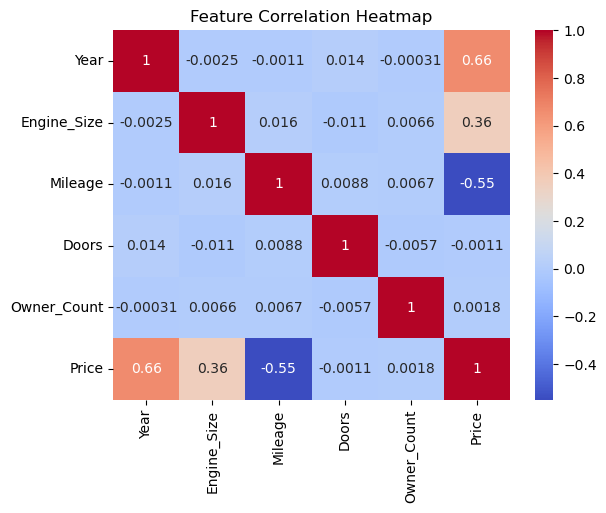

In [26]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm").set(title="Feature Correlation Heatmap")
plt.show()


# Conclusion

Observation: Mileage, Year, and Engine Size are key factors influencing Price, providing insights for predictive modeling.

Conclusion of Car Price Data Analysis 🚗📊
1.Car Prices Follow a Right-Skewed Distribution:

Most cars are priced in the lower range, while a few high-end models have significantly higher prices.

2,Newer Cars Have Higher Prices:

Car value depreciates over time, with older models having lower prices compared to newer ones.

3.Fuel Type Trends:

Petrol and Diesel cars dominate the market, while Electric vehicles are still less common, reflecting current industry adoption rates.

4.Mileage vs. Price Relationship:

Higher mileage generally results in lower prices, but some high-mileage cars retain value, likely due to brand reputation or premium models.

5.Outlier Detection & Cleaning:

Extreme values in Price were identified and removed to ensure accurate trend analysis.

6.Key Influencing Factors on Price:

Year, Mileage, and Engine Size show strong correlation with price, making them key determinants in car valuation.

7.No Missing or Duplicate Data:

The dataset is clean and complete, ensuring reliable insights.

Final Insights:
This analysis provides a strong foundation for car price prediction models and market trend analysis. Future studies could explore brand-wise price variations, customer preferences, and forecasting price trends for upcoming years. 